# import libraries

In [49]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

# import the dataset

In [50]:
df = pd.read_csv('LoanApprovalPrediction.csv')

# check the shape of the dataset

In [3]:
# number of rows
print(f'Number of rows: {df.shape[0]}')

# number of columns
print(f'Number of columns: {df.shape[1]}')

Number of rows: 598
Number of columns: 13


# check the dataset

In [51]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# drop loan_id column

In [52]:
df.drop('Loan_ID', axis=1, inplace=True)

In [53]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
593,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# check the datatypes

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 56.2+ KB


# check for null-nan values

In [55]:
df.isnull().mean() * 100

Gender               0.000000
Married              0.000000
Dependents           2.006689
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.511706
Loan_Amount_Term     2.341137
Credit_History       8.193980
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# replace nan values with mean value

In [57]:
# function to replace nan values with the mean 
def mean_value(dataframe, columns):
    for column in columns:
        mean = dataframe[column].mean()
        dataframe[column] = dataframe[column].fillna(mean)

In [58]:
# apply the function
mean_value(df, ['Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])

In [60]:
# check if the changes have been applied
df.isnull().mean() * 100

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [63]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,144.968804,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
593,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
594,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
595,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
596,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# Convert string data columns to numerical

In [67]:
# import label encoder
from sklearn.preprocessing import LabelEncoder


# create function to convert non-numerical types to numerical
def to_numerical(dataframe):
    le = LabelEncoder()
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            dataframe[column] = le.fit_transform(dataframe[column])

In [69]:
# apply the function
to_numerical(df)

In [72]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,144.968804,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
594,1,1,3.0,0,0,4106,0.0,40.000000,180.0,1.0,0,1
595,1,1,1.0,0,0,8072,240.0,253.000000,360.0,1.0,2,1
596,1,1,2.0,0,0,7583,0.0,187.000000,360.0,1.0,2,1


# Make plots

<Axes: title={'center': 'Count of loan Status'}, xlabel='Loan_Status', ylabel='count'>

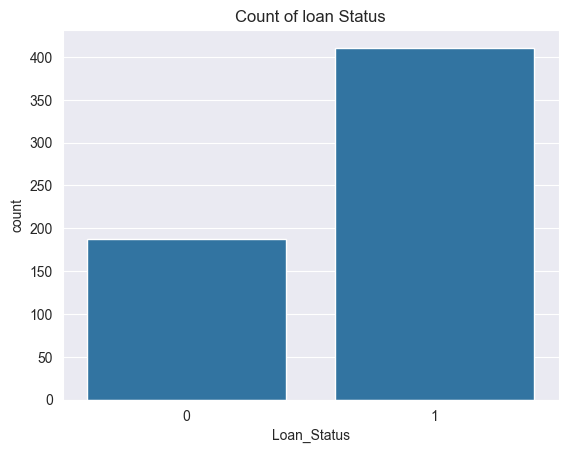

In [75]:
plt.title('Count of loan Status')
sns.countplot(data=df, x='Loan_Status')

<Axes: >

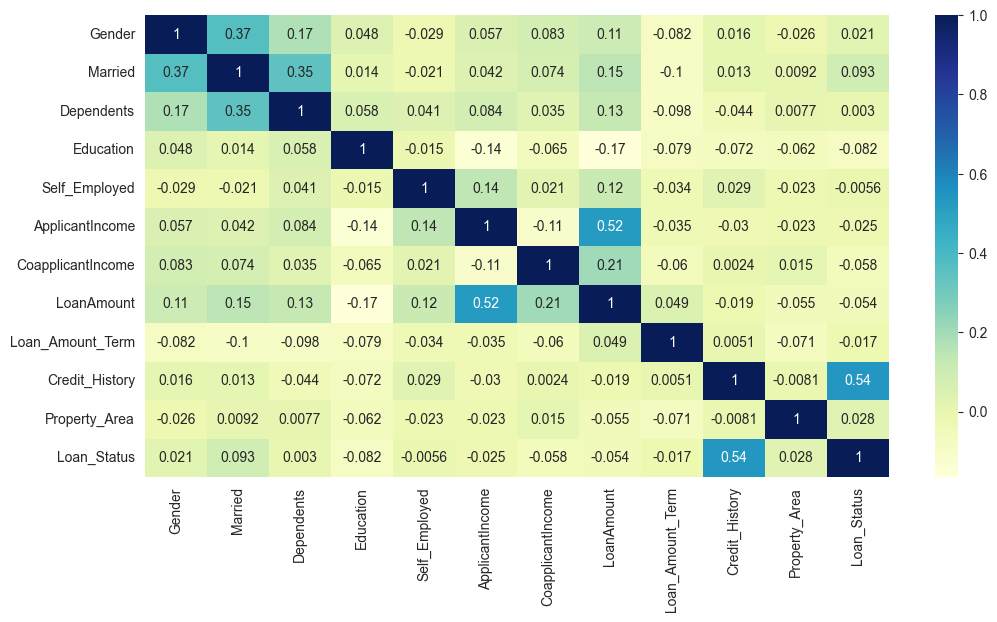

In [79]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='Gender', ylabel='count'>

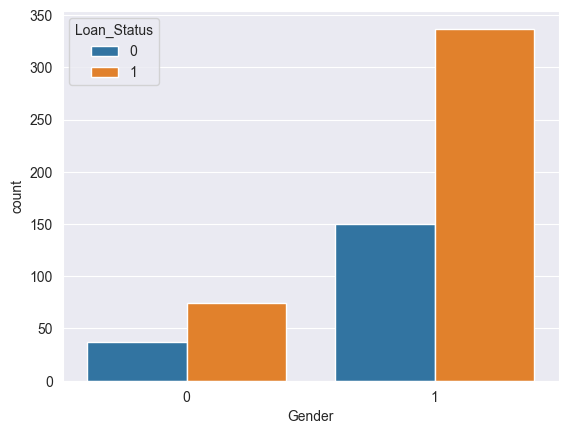

In [83]:
sns.countplot(data=df, x='Gender', hue='Loan_Status')

<Axes: xlabel='Married', ylabel='count'>

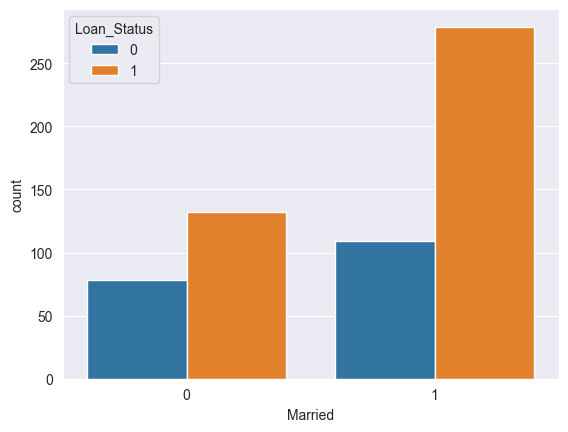

In [84]:
sns.countplot(data=df, x='Married', hue='Loan_Status')

# split the dataset

In [85]:
# import train_split function
from sklearn.model_selection import train_test_split

# all columns except the target column
X = df.drop('Loan_Status', axis=1)

# target column
y = df['Loan_Status']

# split the df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# First Model KNN

In [86]:
# import KNN 
from sklearn.neighbors import KNeighborsClassifier

# create an instance of KNN
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Predictions

In [95]:
features = np.array([[rd.choice(df[column])] for column in X_test.columns]).reshape(1, -1)

prediction = knn.predict(features)
print(f'Predicted loan status: {prediction[0]}')

Predicted loan status: 1


C:\Users\nick-\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# evaluation

In [112]:
actual_value = rd.choice(y_test.values)

print(f'Actual loan status: {actual_value}')

if prediction[0] == actual_value:
    print("The prediction is correct.")
else:
    print("The prediction is incorrect.")

Actual loan status: 0
The prediction is incorrect.


In [114]:
pred = knn.predict(X_test)

# accuracy score, metrics

In [115]:
# import the metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy = accuracy_score(y_test, pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.6416666666666667


In [116]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.30      0.21      0.25        34
           1       0.72      0.81      0.77        86

    accuracy                           0.64       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.60      0.64      0.62       120

[[ 7 27]
 [16 70]]


# Naive Bayes Model

In [117]:
# import NB model
from sklearn.naive_bayes import GaussianNB

# create an instance of NB
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [118]:
# predict
pred = gnb.predict(X_test)

In [119]:
# accuracy

nb_accuracy = accuracy_score(y_test, pred)

print(f'NB accuracy: {nb_accuracy}')

NB accuracy: 0.7583333333333333


In [120]:
# metrics

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.59      0.47      0.52        34
           1       0.81      0.87      0.84        86

    accuracy                           0.76       120
   macro avg       0.70      0.67      0.68       120
weighted avg       0.75      0.76      0.75       120

[[16 18]
 [11 75]]


# Logistic Regression Model

In [136]:
# import logistic regression model
from sklearn.linear_model import LogisticRegression

# create an instance of Logistic Regression
lr = LogisticRegression(max_iter=4000)

# fit the model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [137]:
# predictions
pred = lr.predict(X_test)

In [138]:
# lr accuracy
lr_accuracy = accuracy_score(y_test, pred)

print(f'Logistic Regression accuracy: {lr_accuracy}')

Logistic Regression accuracy: 0.825


In [139]:
# metrics
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.47      0.60        34
           1       0.82      0.97      0.89        86

    accuracy                           0.82       120
   macro avg       0.83      0.72      0.75       120
weighted avg       0.83      0.82      0.81       120

[[16 18]
 [ 3 83]]


# SVM Model

In [140]:
# import SVM model
from sklearn.svm import SVC

# create an instance of SVM model
svm = SVC()

# fit the model
svm.fit(X_train, y_train)

SVC()

In [141]:
# predictions
pred = svm.predict(X_test)

In [142]:
# SVM accuracy
svm_accuracy = accuracy_score(y_test, pred)

print(f'SVM accuracy: {svm_accuracy}')

SVM accuracy: 0.725


In [143]:
# metrics
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        34
           1       0.72      1.00      0.84        86

    accuracy                           0.72       120
   macro avg       0.86      0.51      0.45       120
weighted avg       0.80      0.72      0.62       120

[[ 1 33]
 [ 0 86]]


# Random Forest Model

In [147]:
# import RF model
from sklearn.ensemble import RandomForestClassifier

# create an instance of RF model
rf = RandomForestClassifier()

# fit the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [148]:
# predictions

pred = rf.predict(X_test)

In [150]:
# accuracy
rf_accuracy = accuracy_score(y_test, pred)

print(f'Random Forest accuracy: {rf_accuracy}')

Random Forest accuracy: 0.8


In [151]:
# metrics
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.47      0.57        34
           1       0.82      0.93      0.87        86

    accuracy                           0.80       120
   macro avg       0.77      0.70      0.72       120
weighted avg       0.79      0.80      0.79       120

[[16 18]
 [ 6 80]]
